# K-Means Clustering

[K-means clustering](https://www.ibm.com/think/topics/k-means-clustering) is an unsupervised learning algorithm:

"K-means is an iterative, centroid-based clustering algorithm that partitions a dataset into similar groups based on the distance between their centroids. The centroid, or cluster center, is either the mean or median of all the points within the cluster depending on the characteristics of the data."

Choosing k is very important in this algorithm. First, we must initialize the value, which we can do through random selection. Higher k values create smaller and more specific clusters whereas lower k values create larger and broader clusters.

## Assumptions

- Clusters are spherical and equally sized

- Data is numeric and continuous

- Each point belongs to only one cluster (exclusive)

- Sensitive to outliers and initialization

While K-means is fast and scalable, it may underperform with irregularly shaped clusters or data with varying densities. In such cases, alternative methods like [DBSCAN](../2.%20DBSCAN/dbscan.ipynb) may be more effective.

## Algorithm
1. **Choose the number of clusters k:** Decide how many clusters you want to group the data into.

2. **Initialize centroids:** Randomly select k data points as the initial centroids (or use k-means++ for better starting points).

3. **Assign points to nearest centroid:** For each data point, compute the distance (typically Euclidean) to each centroid. Assign the point to the cluster with the nearest centroid.

4. **Update centroids:** Recalculate the centroid of each cluster by taking the mean of all points assigned to that cluster. 

5. **Repeat until convergence:** Repeat steps 3 and 4 until the assignments no longer change or a maximum number of iterations is reached.

6. **Return final clusters:** Output the final clusters and their centroids.

## Explore Dataset

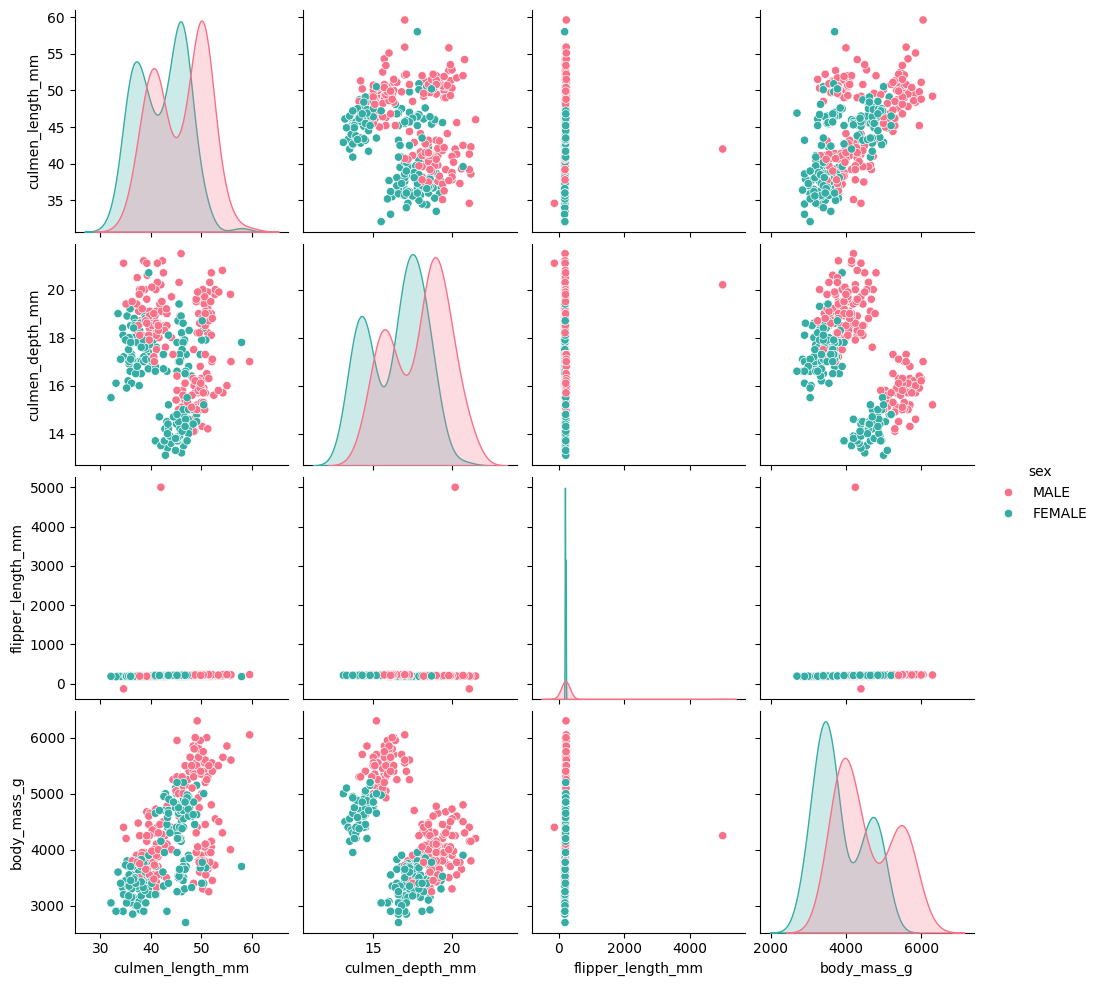

In [19]:
# Load the penguins dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

df = pd.read_csv("penguins.csv")

# Drop rows with NaN or "." in the 'sex' column
df_clean = df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]]
df_clean = df_clean[df_clean["sex"].isin(["MALE", "FEMALE"])]

# Now plot
sns.pairplot(df_clean, hue="sex", diag_kind="kde", palette="husl")

This pairplot visualizes the relationships between penguin body measurements by sex. We observe clear positive correlations between culmen_length_mm and body_mass_g, and between culmen_length_mm and culmen_depth_mm, suggesting that penguins with longer beaks tend to weigh more. The KDE curves (diagonal) show that male penguins generally have higher values for body mass and culmen length compared to females. However, flipper_length_mm appears to have many zero or invalid entries (visible as vertical stacks), which may indicate missing or corrupted data that should be cleaned before further analysis. Overall, these measurements show moderate sexual dimorphism, especially in body mass and culmen dimensions.

From the plots, let's pick culmen length and body mass since it produced a nice spread of points for k-means clustering.

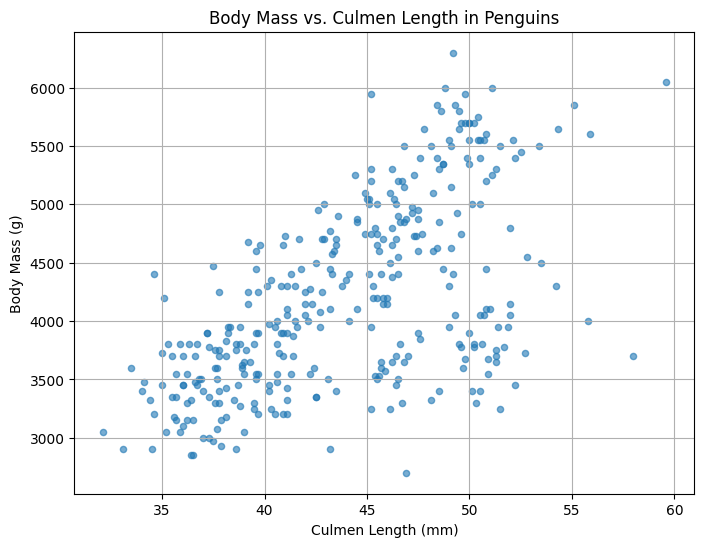

In [20]:
# Drop rows with missing values in the columns we care about
df_clean = df[["body_mass_g", "culmen_length_mm"]].dropna()

# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df_clean["culmen_length_mm"], df_clean["body_mass_g"], alpha=0.6, s=20)
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Body Mass vs. Culmen Length in Penguins")
plt.grid(True)
plt.show()

This looks like a good dataset to perform k-means clustering. It has a  positive correlation between culmen length and body mass, with visible groupings and density pockets. The data is numerical, continuous, and relatively well-distributed.

## Implement and Evaluate Model

Silhouette Score: 0.4672437919214364


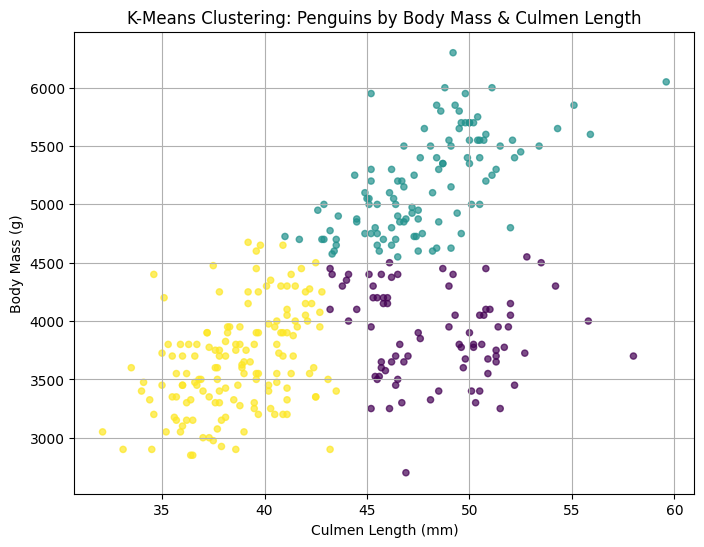

In [6]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
print("Silhouette Score:", silhouette_score(X_scaled, labels))

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_clean["culmen_length_mm"], df_clean["body_mass_g"], 
            c=labels, cmap="viridis", s=20, alpha=0.7)
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("K-Means Clustering: Penguins by Body Mass & Culmen Length")
plt.grid(True)
plt.show()

[silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) evaluates the quality of a clustering result by measuring how well each point fits within its assigned cluster compared to other clusters. It ranges from -1 to 1, where a score close to 1 means the point is well-matched to its own cluster and far from neighboring clusters. The score is based on the difference between the average intra-cluster distance and the nearest-cluster distance. Higher average silhouette scores indicate better-defined and more cohesive clusters.

A silhouette score of 0.467 suggests moderately good clustering. It indicates some meaningful structure, but the clusters are not very well-separated. While better than random, the result could likely be improved by adjusting the number of clusters or refining the features.

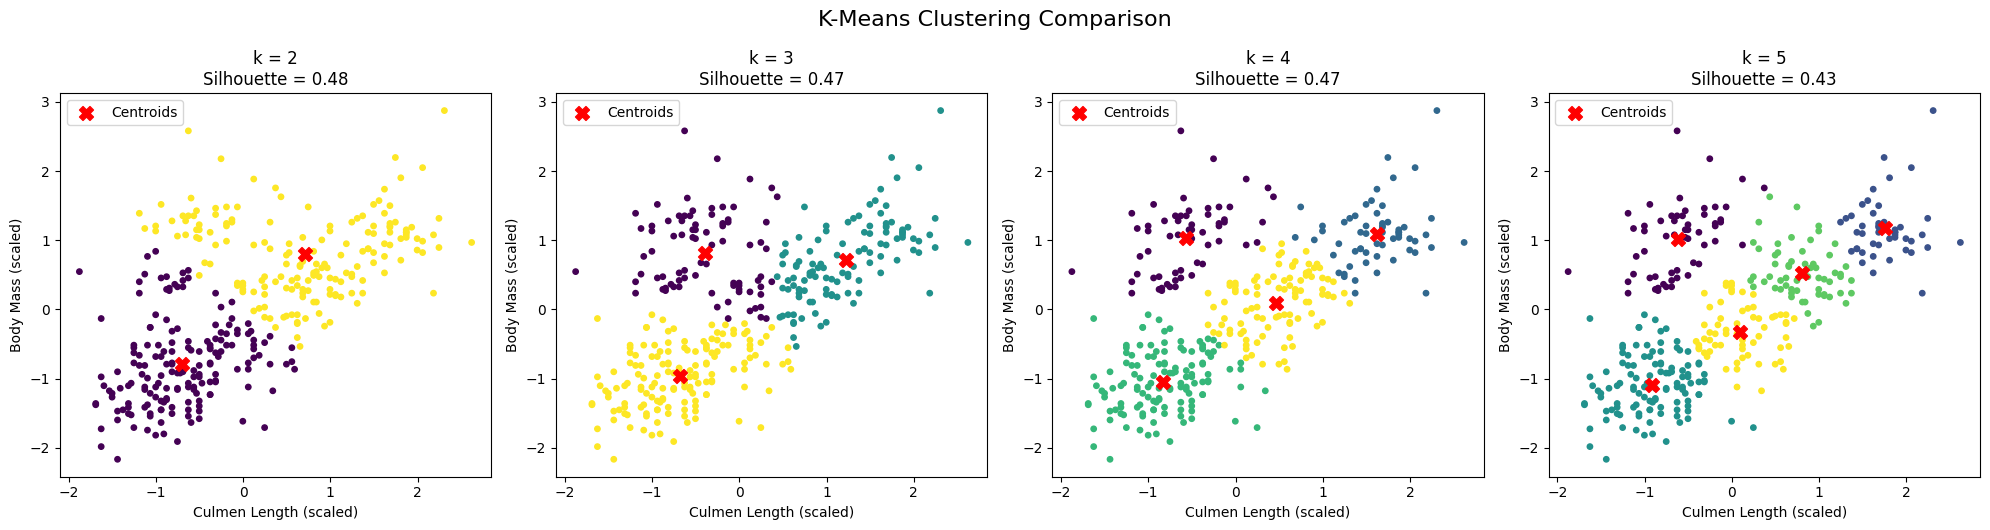

In [17]:
k_values = [2, 3, 4, 5]
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)

    # Plot
    ax = axes[i]
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap="viridis", s=15)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
               c='red', marker='X', s=100, label="Centroids")
    ax.set_title(f"k = {k}\nSilhouette = {score:.2f}")
    ax.set_xlabel("Culmen Length (scaled)")
    ax.set_ylabel("Body Mass (scaled)")
    ax.legend()

plt.tight_layout()
plt.suptitle("K-Means Clustering Comparison", fontsize=16, y=1.05)
plt.show()


This comparison shows that the best silhouette score occurs at k = 2 (0.48), indicating relatively well-separated clusters. Scores remain similar for k = 3 and 4 (0.47), suggesting additional clusters capture some nuance but don't improve cohesion significantly. At k = 5, the silhouette drops to 0.43, implying over-segmentation and less clearly defined clusters. Overall, k = 2 or 3 provides the best balance of separation and simplicity for this dataset.